<a href="https://colab.research.google.com/github/DataAnalysis-python/soccer-FIFA/blob/main/%EC%9D%B4%EC%A0%81%EB%A3%8C_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train= pd.read_csv('/content/drive/MyDrive/데이콘/FIFA_train.csv')

In [4]:
#train.rename(columns={'age': '나이', 'stat_overall' : '선수의 현재 능력치' ,'stat_potential' : '선수의 발전 가능성', 'value' : '이적료', 
                    #  'continent' : '선수들의 국적', 'contract_until' : '선수의 계약 기간', 'position' : '선수의 포지션',
                    #  'prefer_foot' : '선수의 주 발', 'reputation' : '선수의 유명도', 'stat_skill_moves' : '선수의 개인 능력'}, inplace=True)

In [5]:
# 컬럼의 고유값 개수를 확인 

for col in train.columns:
  n_unique=len(train[col].unique())
  print(col,n_unique)

id 8932
name 8932
age 25
continent 5
contract_until 17
position 4
prefer_foot 2
reputation 5
stat_overall 46
stat_potential 45
stat_skill_moves 5
value 198


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


[Text(0.5, 1.0, 'log_value boxplot')]

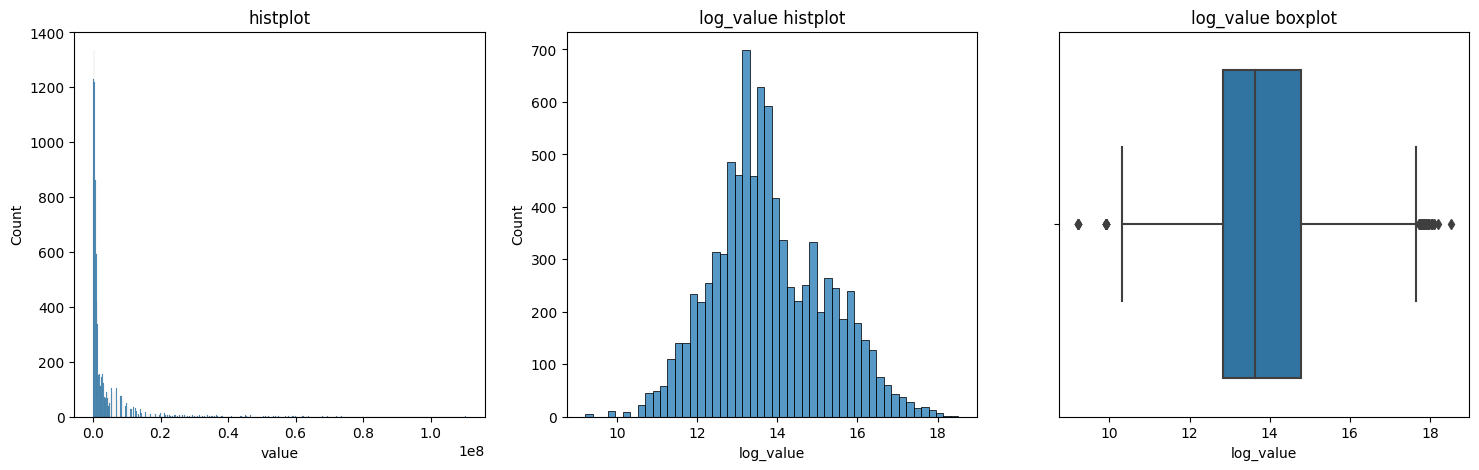

In [7]:
f , axes = plt.subplots(1,3)
axes = axes.flatten()
f.set_size_inches(18,5)

# 이적료에 log
train["log_value"] = np.log(train["value"])

sns.histplot(x="value", data=train, ax=axes[0])
axes[0].set(title = "histplot")
#로그변환 
sns.histplot(x="log_value", data=train, ax=axes[1])
axes[1].set(title = "log_value histplot")
# 이상치 확인
sns.boxplot(x="log_value", data=train, ax=axes[2])
axes[2].set(title = "log_value boxplot")

*시장 가격의 편차가 있다.*

In [8]:
 # 필요없는 데이터 삭제
 
train.drop(['id','name'],axis=1,inplace=True)

In [9]:
# 데이터 프레임의 열 간의 상관관계를 시각적으로 표현

train.corr().style.background_gradient(cmap='Blues_r')

<ipython-input-9-2351c1afb92e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr().style.background_gradient(cmap='Blues_r')


,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,log_value
age,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319,0.184635
reputation,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982,0.480682
stat_overall,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444,0.938548
stat_potential,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907,0.793474
stat_skill_moves,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500,0.476796
value,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000,0.694398
log_value,0.184635,0.480682,0.938548,0.793474,0.476796,0.694398,1.000000


=>reputation과 stat_overall이 상관관계를 가진다. 

In [10]:
#계약기간 type은 object 

train.contract_until.value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [11]:
"""계약기간을 유의미한 값으로 변경
계약기간의 기간을 yyyy로 고정"""
def func(string: str) -> int:
    string = str(string)[-4:]
    return int(string)

train['contract_until'] = train['contract_until'].apply(func)


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   object 
 2   contract_until    8932 non-null   int64  
 3   position          8932 non-null   object 
 4   prefer_foot       8932 non-null   object 
 5   reputation        8932 non-null   float64
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   float64
 9   value             8932 non-null   float64
 10  log_value         8932 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 767.7+ KB


In [13]:
train['continent']=train['continent'].astype('category').cat.codes
train['position'] = train['position'].astype('category').cat.codes
train['prefer_foot'] = train['prefer_foot'].astype('category').cat.codes

In [14]:
train.prefer_foot

0       0
1       1
2       1
3       1
4       1
       ..
8927    1
8928    1
8929    1
8930    1
8931    1
Name: prefer_foot, Length: 8932, dtype: int8

In [15]:
'''
1. 지도학습의 훈련을 위해  
X_train : 선수에 정보가 담긴 데이터
y_train : 선수의 이적료 데이터 
로 데이터를 분리
2. 테스트를 위해 훈련데이터와 테스트 데이터로 나눈다 
'''

from sklearn.model_selection import train_test_split

# X = train.drop(['value'],axis=1)
X=train
y = train['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

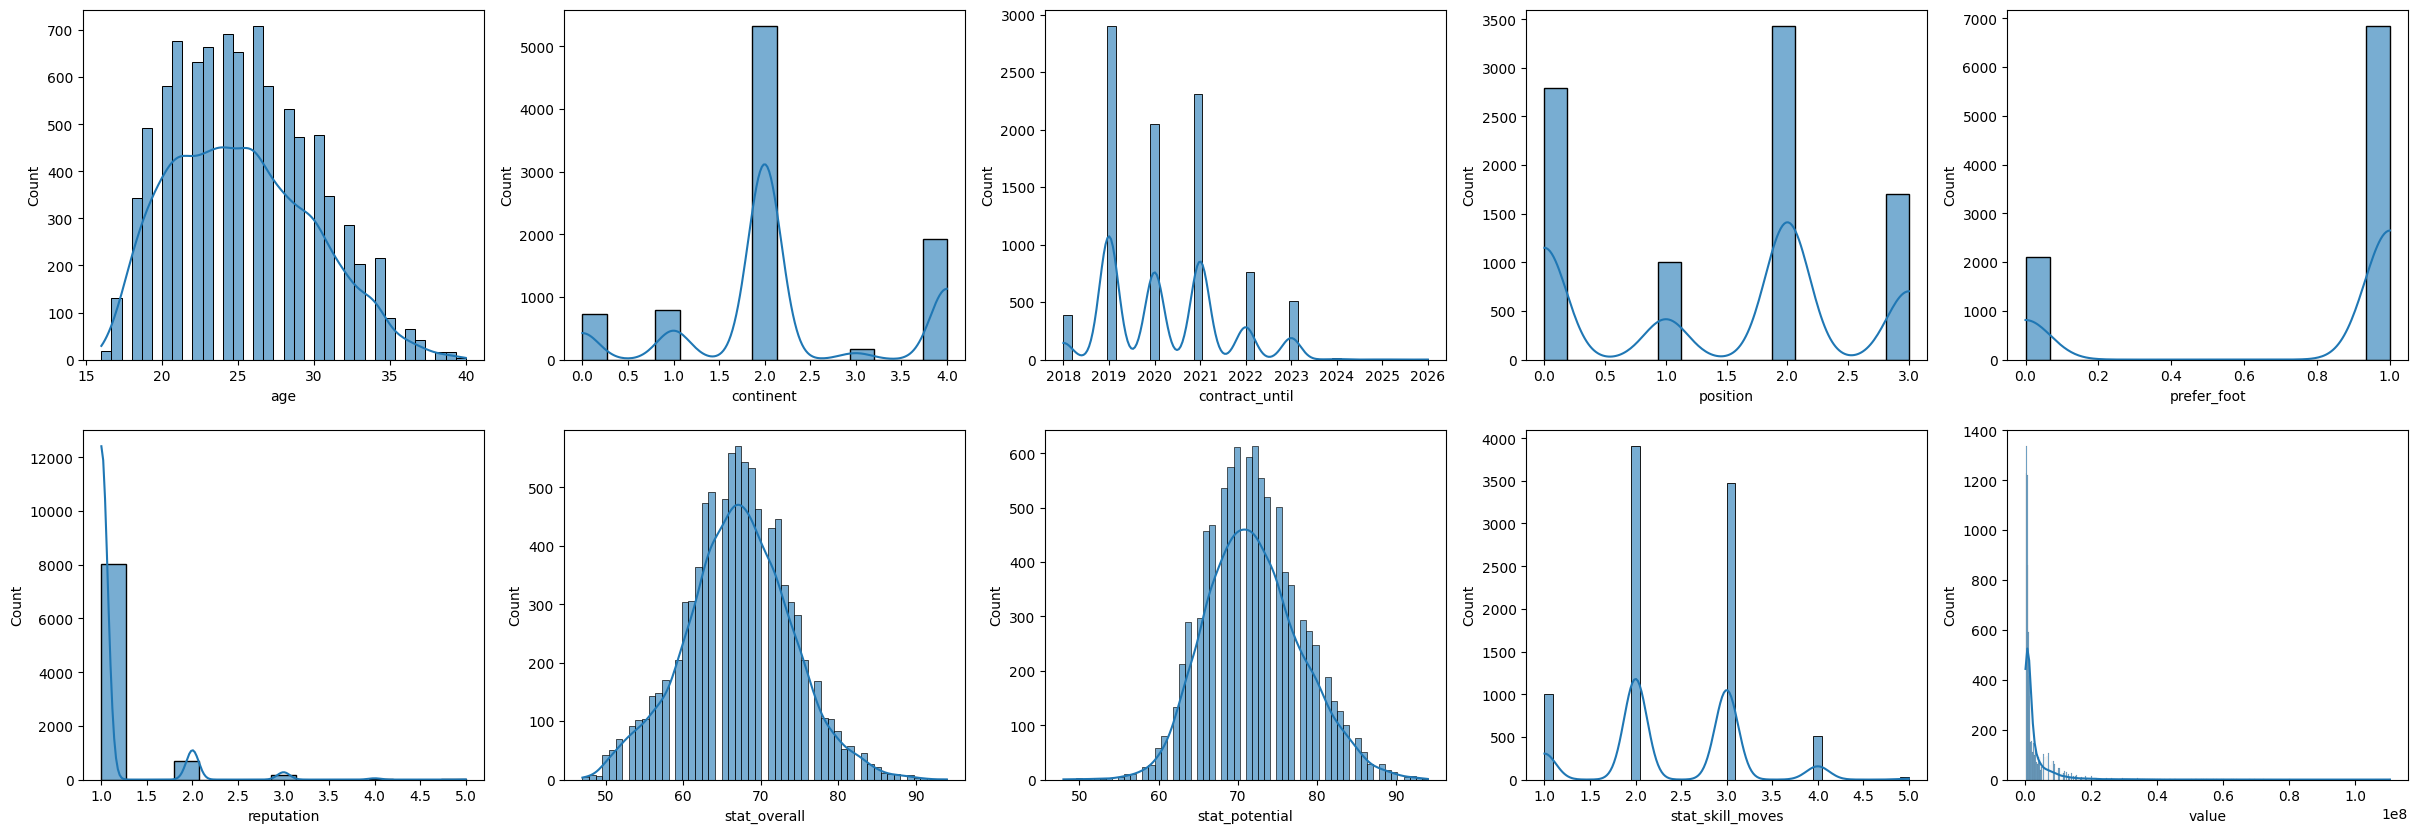

In [16]:
# 데이터 세트 시각화

f, axes = plt.subplots(2,5, figsize=(30,10)) 
axes = axes.flatten()
for col,ax in zip(X.columns, axes):
    sns.histplot(data = X, x=col, ax=ax, alpha=0.6, kde=True)
plt.show()

In [17]:
X.corr().style.background_gradient(cmap='Blues')

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,log_value
age,1.000000,0.091028,-0.132052,-0.079128,0.007760,0.263468,0.467345,-0.231303,0.039362,0.087319,0.184635
continent,0.091028,1.000000,0.040910,-0.020053,-0.019312,0.012608,0.099486,0.072312,0.012365,0.039554,0.075725
contract_until,-0.132052,0.040910,1.000000,0.020076,-0.004760,0.070446,0.156983,0.258477,0.082641,0.228638,0.214344
position,-0.079128,-0.020053,0.020076,1.000000,0.105502,0.031215,0.015825,0.069233,0.384022,0.074980,0.102793
prefer_foot,0.007760,-0.019312,-0.004760,0.105502,1.000000,0.003859,-0.036585,-0.029030,-0.109107,-0.008204,-0.038607
reputation,0.263468,0.012608,0.070446,0.031215,0.003859,1.000000,0.521389,0.399183,0.196582,0.665982,0.480682
stat_overall,0.467345,0.099486,0.156983,0.015825,-0.036585,0.521389,1.000000,0.665453,0.400164,0.658444,0.938548
stat_potential,-0.231303,0.072312,0.258477,0.069233,-0.029030,0.399183,0.665453,1.000000,0.332578,0.611907,0.793474
stat_skill_moves,0.039362,0.012365,0.082641,0.384022,-0.109107,0.196582,0.400164,0.332578,1.000000,0.298500,0.476796
value,0.087319,0.039554,0.228638,0.074980,-0.008204,0.665982,0.658444,0.611907,0.298500,1.000000,0.694398


In [18]:
#학습데이터 

train.columns

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'value', 'log_value'],
      dtype='object')

In [19]:
# reputation열의 값 배열을 2차원으로 열백터로 재배열

X = train['reputation'].values
X = X.reshape(-1,1)
X.shape

(8932, 1)

In [20]:
# value 배열값을 2차원으로 재배열

y = train['value'].values
y = y.reshape(-1,1)
y.shape

(8932, 1)

In [21]:
X_train.shape,y_train.shape

((7145, 11), (7145,))

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7145, 1), (1787, 1), (7145, 1), (1787, 1))

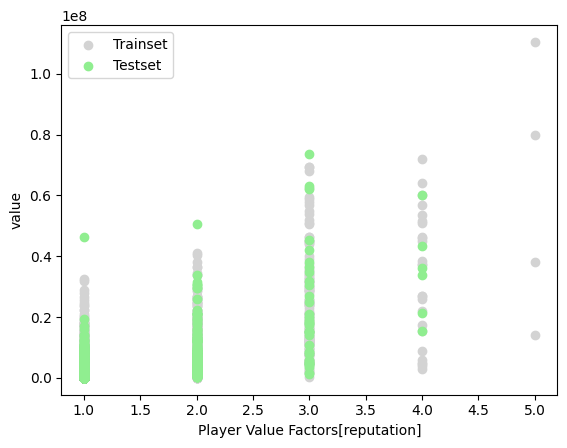

In [24]:
# reputation과 value값의 관계를 알아보기 위해 산점도를 확인 
def draw_data():
  plt.scatter(x=X_train,y=y_train, label='Trainset', color='lightgray')
  #plt.show()
  plt.scatter(x=X_test, y=y_test, label='Testset', color='lightgreen')
  plt.xlabel('Player Value Factors[reputation]')
  plt.ylabel('value')
  plt.legend()
draw_data()

train,test는 어느정도 비슷한 유형의 모습을 띈다. 

In [25]:
X = train['stat_overall'].values
X = X.reshape(-1,1)
X.shape

(8932, 1)

In [26]:
y = train['value'].values
y = y.reshape(-1,1)
y.shape

(8932, 1)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7145, 1), (1787, 1), (7145, 1), (1787, 1))

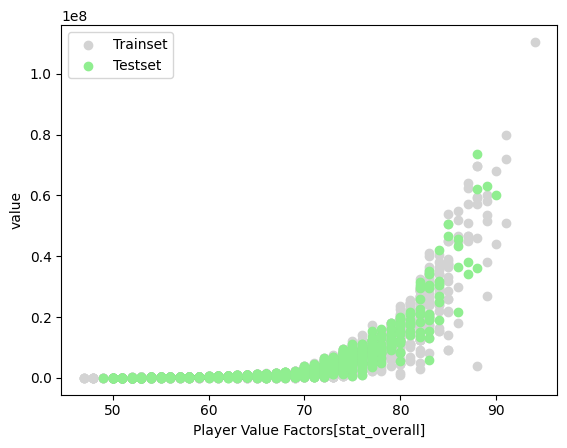

In [28]:
def draw_data():
  plt.scatter(X_train, y_train, label='Trainset', color='lightgray')
  plt.scatter(X_test, y_test, label='Testset', color='lightgreen')
  plt.xlabel('Player Value Factors[stat_overall]')
  plt.ylabel('value')
  plt.legend()
draw_data()